# Predicting House Prices with Linear Regression

## Description:

The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.


## Key Concepts and Challenges:

Data Collection: Obtain a dataset with numerical features and a target variable for
prediction.

Data Exploration and Cleaning: Explore the dataset to understand its structure, handle
missing values, and ensure data quality.

Feature Selection: Identify relevant features that may contribute to the predictive model.

Model Training: Implement linear regression using a machine learning library (e.g., Scikit-
Learn).

Model Evaluation: Evaluate the model's performance on a separate test dataset using
metrics such as Mean Squared Error or R-squared.

Visualization: Create visualizations to illustrate the relationship between the predicted and
actual values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C://Users//srivi//Downloads//Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
cat_cols = data.select_dtypes(include=["object"]).columns.tolist()
if cat_cols:
    print("\nCategorical column value counts:")
    for col in cat_cols:
        print(f"\n-- {col} --")
        display(data[col].value_counts())


Categorical column value counts:

-- mainroad --


yes    468
no      77
Name: mainroad, dtype: int64


-- guestroom --


no     448
yes     97
Name: guestroom, dtype: int64


-- basement --


no     354
yes    191
Name: basement, dtype: int64


-- hotwaterheating --


no     520
yes     25
Name: hotwaterheating, dtype: int64


-- airconditioning --


no     373
yes    172
Name: airconditioning, dtype: int64


-- prefarea --


no     417
yes    128
Name: prefarea, dtype: int64


-- furnishingstatus --


semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [8]:
target = "price"
X = data.drop(columns=[target])
y = data[target]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (545, 12)
Target shape: (545,)


In [9]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

### Feature Selection

In [11]:
X_encoded = pd.get_dummies(X, drop_first=True)

print("Encoded features shape:", X_encoded.shape)
display(X_encoded.head())

Encoded features shape: (545, 13)


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0


### Model Training

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X_encoded , y , test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

### Model Evaluation

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation on Test Data:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Model Evaluation on Test Data:
Mean Squared Error (MSE): 1754318687330.66
Root Mean Squared Error (RMSE): 1324506.96
R-squared (R²): 0.6529


In [21]:
sample_dict = {
    'area': 8000,
    'bedrooms': 5,
    'bathrooms': 3,
    'stories': 2,
    'parking': 2,
    'mainroad_yes': 1,
    'guestroom_yes': 0,
    'basement_yes': 1,
    'hotwaterheating_yes': 1,
    'airconditioning_yes': 1,
    'prefarea_yes': 1,
    'furnishingstatus_semi-furnished': 0,
    'furnishingstatus_unfurnished': 0
}

new_data = pd.DataFrame([sample_dict])

new_data = new_data[X_encoded.columns]

predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])


Predicted Price: 9943785.98729134


### Visualization

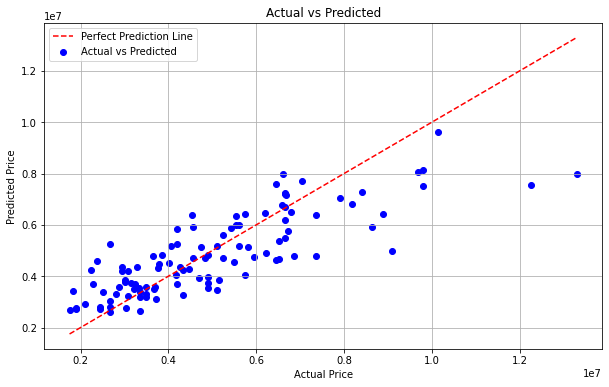

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(line, line, color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

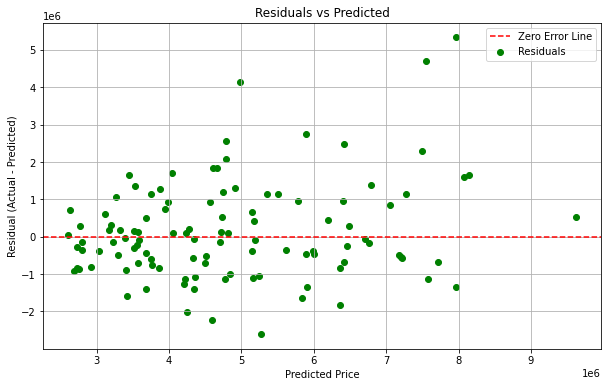

In [23]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')

plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

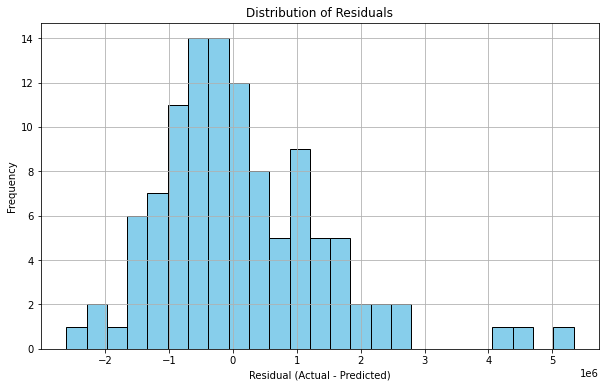

In [24]:
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()